# Generating Random Variables

## Introduction  

In this section we'll cover the following methods for generating random numbers from a target distribution.

1. Uniform random samples

2. Transformation Method

3. Inverse Transform Method

4. Accept-Reject Method






## Pseudo-random samples  

One of the requirements for Monte Carlo methods is the ability to generate consistent *pseudo*-random samples from a specified probability distribution. One of the most fundamental tools is a uniform random number generater

- Applying transformations to uniform samples, we can sample from many different distributions

- Computers on their own can't generate *randomness*, but they can simulate what *random* may look like

In R, we can control how random samples are generated. For example, we can specify seed for random number generation, see the function [`set.seed`](https://stat.ethz.ch/R-manual/R-devel/library/base/html/Random.html)

- `set.seed` allows us to control the start and flow (*state*) of random number generation in a program

- Useful for reproducibility

- On StackOverflow: [Reasons for using the set.seed function](https://stackoverflow.com/questions/13605271/reasons-for-using-the-set-seed-function)


## Generation uniform samples 

Random number generation for statistical purposes heavily relies on the assumption that computational methods can consistently generate *independent* uniform random numbers.



In [172]:
import numpy as np
import matplotlib.pyplot as plt

## set style
plt.style.use("ggplot") ## use plt.style.availalbe to see all styles

def summary(data):
    """ To print out summary statistics"""
    titles = " Min.:, 1st Qu.:, Median:, 3rd Qu.:, Max.:".split(",")
    percentiles = np.round(
        np.percentile(a=data, interpolation='midpoint', 
                      q=[0, 25, 50, 75, 100]), 4)
    out = dict(zip(titles, percentiles))
    mean = np.round(np.mean(a = data) )
    out.update({" Mean:" : mean})
    for k, val in out.items():
        print(k, val)
    #return out

def table(data, prob=False):
    """Count unique values
    return a tuple(value, count)"""
    vals_counts = np.unique(ar=data, return_counts=True)
    if prob:
        density = vals_counts[1] / len(data)
        vals_counts = (vals_counts[0], density)
    out = tuple(zip(*vals_counts))
    return out

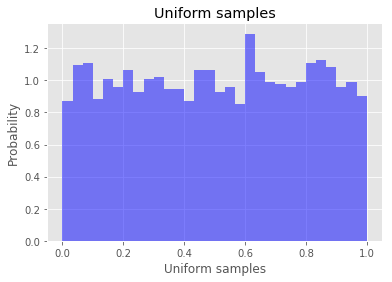

In [173]:
u = np.random.uniform(low=0,high=1,size=2000)
plt.hist(u, bins = 30, normed=1, color='blue', alpha = 0.5)
plt.title("Uniform samples")
plt.xlabel("Uniform samples")
plt.ylabel("Probability")
plt.show()

In [175]:
summary(u)

 Min.: 0.0001
 1st Qu.: 0.2545
 Median: 0.5089
 3rd Qu.: 0.7518
 Max.: 0.9998
 Mean: 1.0


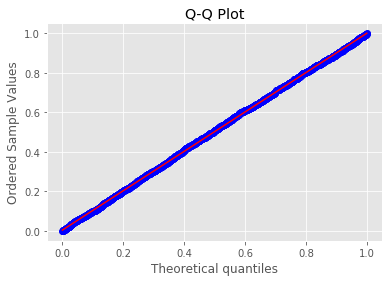

In [176]:
import scipy.stats as stats

stats.probplot(u, dist="uniform", plot=plt)
plt.ylabel("Ordered Sample Values")
plt.title("Q-Q Plot")
plt.show()


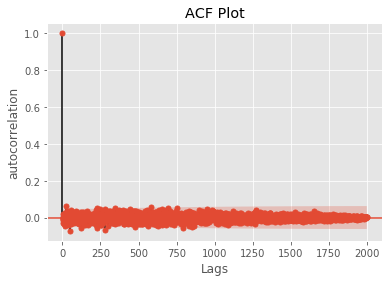

In [177]:
from statsmodels.graphics.tsaplots import plot_acf
#1. pandas
plot_acf(u)
plt.title("ACF Plot")
plt.xlabel("Lags")
plt.ylabel("autocorrelation")
plt.show()



## Generation uniform samples | References 

- [QQ Plot](http://www.itl.nist.gov/div898/handbook/eda/section3/qqplot.htm)

- [Autocorrelation plot](http://www.itl.nist.gov/div898/handbook/eda/section3/autocopl.htm)



## Generation of uniform samples 

For a random variable $u \sim Unif(0,1)$, then $(1 - u) \sim Unif(0,1)$

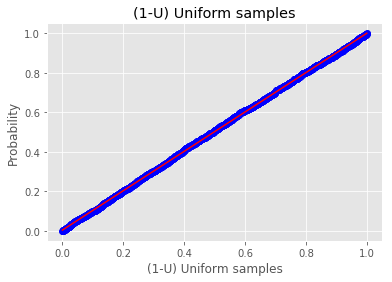

In [178]:
stats.probplot(u, dist="uniform", plot=plt)
plt.title("(1-U) Uniform samples")
plt.xlabel("(1-U) Uniform samples")
plt.ylabel("Probability")
plt.show()




It is important to generate samples that are not correlated with each other!



## Generation of uniform samples, pt. 2 

Once we can simulate $u \sim Unif(0,1)$, we can begin generating samples from other target distributions. How could we simulate $v \sim Unif(0,10)$? Well, we could simply include a multiplicative constant such that $v = 10 \times u$.


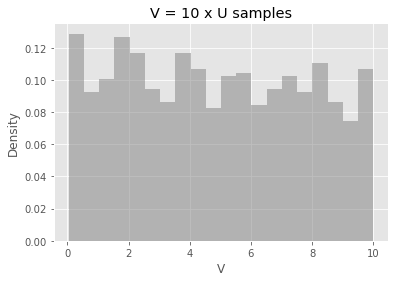

 Min.: 0.0477
 1st Qu.: 2.2457
 Median: 4.7172
 3rd Qu.: 7.368
 Max.: 9.9956
 Mean: 5.0


In [179]:
v = 10 * np.random.uniform(low=0.0, high=1.0, size = 1000)
plt.hist(v, bins=20, color = "gray", alpha = 0.5, normed=True)
plt.title("V = 10 x U samples")
plt.xlabel("V")
plt.ylabel("Density")
plt.show()

summary(v)

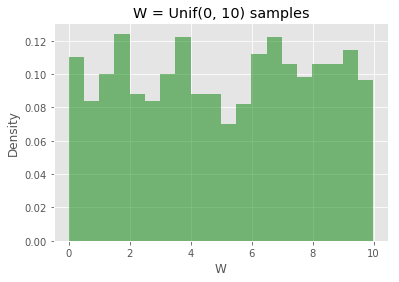

 Min.: 0.0022
 1st Qu.: 2.4701
 Median: 5.0946
 3rd Qu.: 7.5476
 Max.: 9.9838
 Mean: 5.0


In [180]:
w = np.random.uniform(low=0.0, high=10.0, size = 1000)
plt.hist(w, bins=20, color = "green", alpha = 0.5, normed=True)
plt.title("W = Unif(0, 10) samples")
plt.xlabel("W")
plt.ylabel("Density")
plt.show()

summary(w)

## Transformation Methods 

- Distributions sometimes share direct relationships. 
- If the relationship between the instrumental and target distribution is simple, then we can exploit it to generate random variables from the target distribution
- We can sample from an "easy to simulate" distribution and then transform those random samples to generate samples from a "difficult to simulate" distribution. 

To review some common relationships see the following: [Relationships among probability distributions][4]

- Some easy *instrumental* distributions which are easy to sample from include $Unif(a,b)$, $Exp(\theta)$. 

- Some distributions that are more difficult to sample from include the $N(\mu, \sigma)$ and **MVN**  distributions.


## Example: Binomial samples 

Another use of generating samples $U \sim U(0,1)$ is to generate Bernoulli. Once we've generated $n$ Bernoulli samples, we can sum the Bernouilli samples to generate Binomial samples. Reference: [Notes](http://www.stat.ufl.edu/~abhisheksaha/sta4321/lect12.pdf)

$$
u \sim Unif(0,1) \\
x  = I(u \leq p) \text{ such that } x \sim Bernoulli(p) \\
y = \sum_{i=1}^n x_i \text{ such that } y \sim Bin(n,p) \\
$$


In [181]:
## let's simulate 10,000 samples from bin(n=10, p = 0.3)
N = 10000 ## number of Unif and Binomial samples
n = 10 ## number of bernoulli trials for each bernoulli sample
p = 0.3 ## theoretical p
u = np.random.rand(n*N)
x = 1*(u <= p) ## multiply by 1 to convert bools to ints
x = np.reshape(a = x, newshape= (N, n), order='F') ## array to Nxn array

In [182]:
x ## bernoulli samples

array([[0, 1, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 1, 1],
       ..., 
       [0, 1, 0, ..., 0, 1, 1],
       [0, 0, 1, ..., 1, 1, 0],
       [1, 1, 1, ..., 1, 0, 0]])

In [183]:
Binom_samples = x.sum(axis = 1) ## sum by rows
print("Shape: " + str(Binom_samples.shape)) ## number of samples
print("Samples: " + str(Binom_samples))
summary(Binom_samples)

Shape: (10000,)
Samples: [1 2 6 ..., 3 4 5]
 Min.: 0.0
 1st Qu.: 2.0
 Median: 3.0
 3rd Qu.: 4.0
 Max.: 8.0
 Mean: 3.0


In [184]:
#plt.subplot ## subplot(nrows, ncols, plot_number)

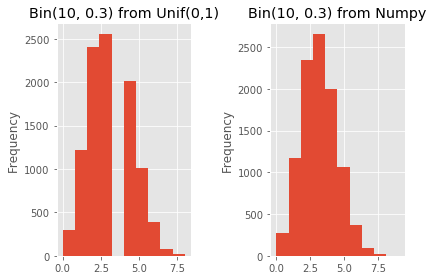

In [208]:
plt.subplot(1, 2, 1) ## plot 1
plt.hist(bins= 10, x=Binom_samples)
plt.title('Bin(10, 0.3) from Unif(0,1)')
plt.ylabel('Frequency')

plt.subplot(1, 2, 2) ## plot 2
plt.hist(bins = 10,
         x = np.random.binomial(n = 10, p = 0.3, size= N))
plt.title('Bin(10, 0.3) from Numpy')
plt.ylabel('Frequency')

plt.tight_layout() ## tight layout
# https://matplotlib.org/users/tight_layout_guide.html
plt.show()


## Inverse Transform Method 

The inverse transform method is a simple algorithm for generating random variables $x$ from a *continuous* target distribution $f(x)$ using random samples from a $Unif(0,1)$ distribution.

General idea: evaluate random variables $u \sim Unif(0,1)$ using the inverse CDF of the target distribution for which you wish to simulate from. See the following link for further discussion: [How does the inverse transform method work?][1]

**Theorem (Probability Integral Transformation): **
If $X$ is a *continuous* random variable with CDF $F_X(X)$, then $U = F_X(X) \sim Unif(0,1)$. If $U \sim Unif(0,1)$, then for all $x \in \mathbb R$

$$
\begin{aligned}
P(F_X^{-1}(U) \leq x) & = P(\inf\{t: F_X(t) = U\} \leq x)\\
\\ & = P(U \leq F_X(x))\\
\\ & =F_U(F_X(x)) \\
\\ & = F_X(x) = P(X \leq x)
\end{aligned}
$$
and therefore $F_X^{-1}(U)$ has the same distribution as $X$.




## Inverse Transform Method, pt. 2 


Algorithm:

1. For target probability density function (*pdf*) $f(X)$, calculate the CDF, $F(X)$

2. Set the CDF equal to $U$, $F(X) = U$, then solving for $X$, obtaining $F^{-1}(U) = X$

2. Generate $n$ random variables from $u \sim Unif(0,1)$

3. Plug in $u$ observed values in $F^{-1}(U = u)$ to obtain $n$ values for which $x \sim f(X)$



## Example: Exponential distribution 

Suppose we are interested in generating $n = 10,000$ random values from an Exponential distribution 

1. $f(X) = \lambda e^{- \lambda X}$

2. $F(X) = 1 - e^{- \lambda X} = U$

3. $F^{-1}(U) = - 1/\lambda \ log(1 - U)$; can use $(1-u)$ or $u$, since both are uniformly distributed.

If we set $\lambda = 5$, then


In [186]:
N = 10**4
u = np.random.rand(N) ## uniform samples
#rate = 5
fInv = lambda u: -(1/5) * np.log(u)

outSamples = fInv(u)
summary(outSamples)

 Min.: 0.0
 1st Qu.: 0.0571
 Median: 0.138
 3rd Qu.: 0.279
 Max.: 2.0123
 Mean: 0.0


In [187]:
print("Inverse Transform")
summary(outSamples)


randsamples = np.random.exponential(scale= 1/5, size= N)
## scale  = 1/rate
print("\nNumpy")
summary(randsamples)

Inverse Transform
 Min.: 0.0
 1st Qu.: 0.0571
 Median: 0.138
 3rd Qu.: 0.279
 Max.: 2.0123
 Mean: 0.0

Numpy
 Min.: 0.0
 1st Qu.: 0.0585
 Median: 0.1386
 3rd Qu.: 0.2739
 Max.: 1.7382
 Mean: 0.0


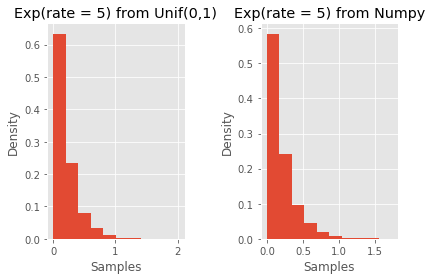

In [188]:
outSamples
## Example: Exponential distribution, pt. 2 

plt.subplot(1, 2, 1) ## subplot 1
w1 = np.ones_like(outSamples)/len(outSamples) ## normalizing weights
plt.hist(outSamples, weights=w1)
plt.xlabel("Samples")
plt.title("Exp(rate = 5) from Unif(0,1)")
plt.ylabel("Density")


plt.subplot(1, 2, 2) ## subplot 2
w2 = np.ones_like(randsamples)/len(randsamples) ## normalizing weights
plt.hist(randsamples, weights=w2)
plt.title("Exp(rate = 5) from Numpy")
plt.xlabel("Samples")
plt.ylabel("Density")

plt.tight_layout()
plt.show()




## Example: Pareto Distribution 

For information on the Pareto distribution, please see: [Pareto Distribution][3]

The $Pareto(a,b)$ distribution has CDF $F(X \leq x) = 1 - (\frac{b}{x})^a$ for $x \geq b > 0, \ a > 0$


1. First set $F(x) = U$, where $U \sim Unif(0,1)$, then solve for $X$
$$
\displaystyle
\begin{aligned}
1 - \left( \frac{b}{x} \right)^2 & = U \\
\ \left(\frac{b}{x} \right)^a & = 1 - U \\
\  \frac{b}{x} & = (1 - U)^{1/a} \\
\ x & = b \times (1 - U)^{-1/a} \\
\ & = F_X^{-1}(U) \\
\end{aligned}
$$



## Example: Pareto Distribution, pt. 2 


```{r}
set.seed(123)
n = 1000
U =runif(n)
a = 3
b = 2
X = b*(1-U)^(-1/a)
pareto = function(x){(a*(b^a)/x^(a+1))}

summary(X)

```

In [189]:
#np.random.seed(123)
n = N ## sample size
U = np.random.uniform(size=n, low=0, high=1) ## uniform samples
a = 3
b = 2
X = b*(1 - U)**(-1/a)
pareto = lambda x: a*(b**a) / x**(a+1)
summary(X)

 Min.: 2.0001
 1st Qu.: 2.2024
 Median: 2.5308
 3rd Qu.: 3.1952
 Max.: 39.3265
 Mean: 3.0


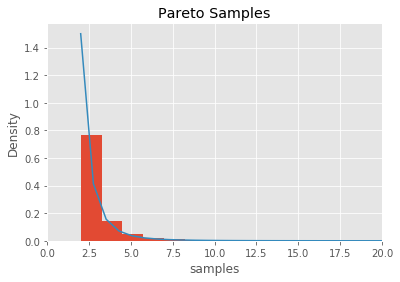

In [190]:
w = np.ones_like(a = X) / len(X) ## normalizing weights
plt.hist(x = X, bins= 30, weights = w)

x2 = np.linspace(2.0, max(X))
y2 = pareto(x2)
plt.plot(x2, y2)

plt.xlim((0, 20))
plt.title("Pareto Samples")
plt.xlabel("samples")
plt.ylabel("Density")

plt.show()

## Inverse Transform Discrete scenario 

For a given ordered discrete random sample $x_1 < ... < x_{i-1} < x_{i} < x_{i+1} < ...< x_n$ from a distribution $f(X)$, with CDF $F(x)$. Then, the inverse transformation $F_X^{-1}(u) = x_i$, where $F_X(x_{i-1}) < u \leq F_X(x_i)$. Then for each random variable desired

1. Generate a random variable $u \sim Unif(0,1)$

2. Deliver $x_i$ where $F(x_{i-1}) < u \leq F(x_{i})$



As an example, take the following distribution $P(X = 0) = 0.1$, $P(X = 1) = 0.2$, $P(X = 2) = 0.2$, $P(X = 3) = 0.2$, and $P(X = 4) = 0.3$, use the inverse transform method to generate a random sample of size 1000 from the distribution.

$$
F(X \leq x) = 
\begin{cases}
    0.1       & \quad  \text{if } x \leq 0 \\
    0.3       & \quad  \text{if } x \leq 1\\
    0.5       & \quad  \text{if } x \leq 2\\
    0.7       & \quad  \text{if } x \leq 3\\
    1.0       & \quad  \text{if } x \leq 4\\
  \end{cases}
$$



## Inverse Transform Discrete scenario, pt. 2 

In [191]:
n = 10**4
u = np.random.uniform(size=n, low = 0, high = 1)

def fInv(v):
    if v <= 0.1:
        x = 0
    elif v > 0.1 and v <= 0.3:
        x = 1
    elif v > 0.3 and v <= 0.5:
        x = 2
    elif v > 0.5 and v <= 0.7:
        x = 3
    else:
        x = 4
    return x

vFInv = np.vectorize(pyfunc=fInv) ## vectorize for performance

In [192]:
results = vFInv(u) ## discrete inverse transform results
results_table = table(results, prob=True)
print(results_table)

((0, 0.098799999999999999), (1, 0.20100000000000001), (2, 0.2029), (3, 0.1983), (4, 0.29899999999999999))


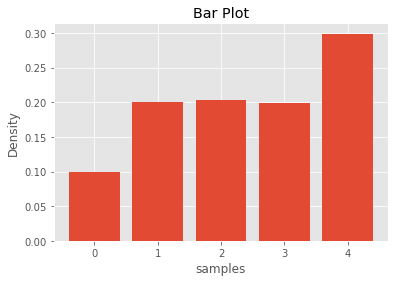

In [193]:
vals, density = tuple(zip(*results_table)) ## unzip tuple

plt.bar(left = vals, height=density)
plt.title("Bar Plot")
plt.ylabel("Density")
plt.xlabel("samples")
plt.show()


$P(X = 0) = 0.1$, $P(X = 1) = 0.2$, $P(X = 2) = 0.2$, $P(X = 3) = 0.2$, and $P(X = 4) = 0.3$


## Accept-Reject  

For notes on the Accept-Rejection algorithm see [Accept-Reject](http://www.columbia.edu/~ks20/4703-Sigman/4703-07-Notes-ARM.pdf)

Suppose that $X$ and $Y$ are random variables with density (or pmf) $f$ and $g$ respectively, and there exists a constant $M$ such that

$$
M \geq \frac{f(t)}{g(t)}
$$

or

$$
M \times g(t) \geq f(t)
$$
for all t such that $f(t) > 0$. If we'd like to simulate from the target density $f(t)$, then the following algorithm can be applied to generate the random variable $X$.




## The Accept-Reject Algorithm 

To generate $n$ samples, `for(i in 1:n)`

  1. Generate $Y \sim g_Y(t)$ and $U \sim Unif(0,1)$

  2. If $U \leq \frac{f(Y)}{M \times g(Y)}$ then we accept $Y$, such that $Y =  X$

  3. Repeat until you have sufficient samples



In order for the algorithm to work we require the following constraings:

1. $f$ and $g$ have to have compatible supports (i.e. $g(x) > 0$ when $f(x) > 0$)

2. There is a constant $M$ such that $\frac{f(t)}{g(t)} \leq M$



## Example: Beta(2,2) 

Suppose we'd like to generate samples from $Beta(2,2)$ distribution. The density function for $Beta(2,2)$ is simply $f(x) = 6x(1 - x)$ for $0 < x < 1$. Since our domain is between 0 and 1, we can use a simple $Unif(0,1)$ density as our instrumental density, $g$. Then, by the accept-reject algorithm we can simulate a random variable $Y \sim g$, and a random variable $U \sim Unif(0,1)$. Then, if 
$$
M \times U \leq \frac{f(Y)}{ g(Y)}
$$
we accept the candidate variable $Y \sim g$ as $X$, $X = Y$. Otherwise, we reject $Y$ and simulate again until we get an appropriate sample size. 


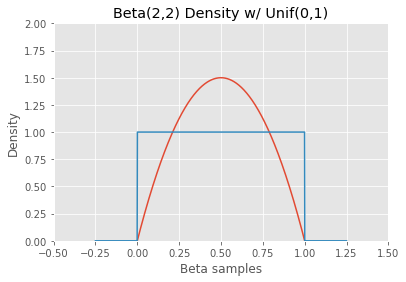

In [194]:
beta = lambda x: 6*x*(1 - x)
M = 1.5

#plt.subplot(1, 2, 1)
x1 = np.linspace(start=-0.25, stop=1.25, num=1000)
y1 = beta(x1)

plt.plot(x1, y1)
plt.title("Beta(2,2) Density w/ Unif(0,1)")
plt.ylabel("Density")
plt.xlabel("Beta samples")
plt.xlim((-0.5, 1.5))
plt.ylim((0,2))

unif = lambda x: 1 if (x >= 0 and x <= 1) else 0
vUnif = np.vectorize(unif)
y2 = vUnif(x1)
plt.plot(x1, y2)

plt.show()


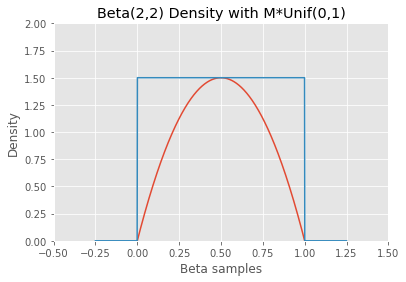

In [195]:
x1 = np.linspace(start=-0.25, stop=1.25, num=1000)
y1 = beta(x1)
M = 1.5

plt.plot(x1, y1)
plt.title("Beta(2,2) Density with M*Unif(0,1)")
plt.ylabel("Density")
plt.xlabel("Beta samples")
plt.xlim((-0.5, 1.5))
plt.ylim((0,2))

unif = lambda x: 1 if (x >= 0 and x <= 1) else 0
vUnif = np.vectorize(unif)
y2 = vUnif(x1) * M ## M * Uniform
plt.plot(x1, y2)

plt.show()



## Example: Beta(2,2), pt. 2 


Note that the target density $f$ has a maximum of 1.5, so we can set M = 1.5; see: [Max of Beta(2,2)](http://www.wolframalpha.com/input/?i=max+6x(1+-+x))


Now, say we needed $n = 10,000$ samples from $Beta(2,2)$, then a better implementation would be



In [196]:
n = 2000
M = 1.5
f = lambda x: 6*x*(1 - x) ## pdf of Beta(2,2)
unif = lambda x: 1 if (x >= 0 and x <= 1) else 0
vUnif = np.vectorize(unif)
g = vUnif ## pdf of Unif(0,1) is just 1

x = np.zeros(n) * np.nan
i = 0
iters = 0
while sum(np.isnan(x)) > 0:
    iters += 1
    U = np.random.rand(1)
    Y = np.random.rand(1)
    accept = np.bool(U * M <= f(Y)/g(Y))
    if accept:
        x[i] = Y
        i += 1


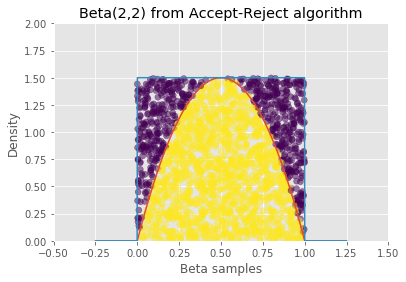

In [158]:
x1 = np.linspace(start=-0.25, stop=1.25, num=1000)
y1 = beta(x1)
M = 1.5

plt.plot(x1, y1)
plt.title("Beta(2,2) from Accept-Reject algorithm")
plt.ylabel("Density")
plt.xlabel("Beta samples")
plt.xlim((-0.5, 1.5))
plt.ylim((0,2))

unif = lambda x: 1 if (x >= 0 and x <= 1) else 0
vUnif = np.vectorize(unif)
y2 = vUnif(x1) * M ## M * Uniform
plt.plot(x1, y2)



x3 = np.random.rand(n)
y3 = np.random.rand(n) * M
accept = (y3 <= f(x3)) + 4
plt.scatter(x=x3, y = y3, alpha=0.5, c=accept)

plt.show()


In [159]:
from scipy import stats

In [160]:
stats.beta.ppf(q=[0.0, 0.25, 0.50, 0.75, 1.0], a = 2, b = 2)

array([ 0.        ,  0.32635182,  0.5       ,  0.67364818,  1.        ])



[1]: https://stats.stackexchange.com/questions/184325/how-does-the-inverse-transform-method-work
[2]: http://www.math.uah.edu/stat/special/Rayleigh.html
[3]: http://www.math.uah.edu/stat/special/Pareto.html
[4]: https://en.wikipedia.org/wiki/Relationships_among_probability_distributions
[5]: http://www.math.uah.edu/stat/special/ChiSquare.html
[6]: http://www.math.uah.edu/stat/special/Gamma.html
[7]: http://www.math.uah.edu/stat/special/Beta.html

In [198]:
n = 10000
M = 1.5
U = np.random.rand(n)
Y = np.random.rand(n)
f = lambda x: 6*x*(1 - x) ## pdf of Beta(2,2)
unif = lambda x: 1 if (x >= 0 and x <= 1) else 0
g = np.vectorize(unif)## pdf of Unif(0,1) is just 1

accepts = U*M <= f(Y)/g(Y)
accept_rate = np.mean(accepts)


In [200]:
print(np.mean(accepts)) ## acceptance rate

0.6685


Exercise: Change the value of M to see how the performance of the algorithm changes



It should be noted that the probability of acceptance is given by $\frac{1}{M}$. So, in order to make an efficient accept-reject algorithm, we should set $M$ to be as high as needed, but no larger! As $M$ increases, the probability of acceptance decreases, and this results in an increase in draws where we do not obtain samples from our target distribution $f$. This increases the computational cost. 




## Other Transformation Methods 

Now that we've covered how to simulate random variables from an $Exp(\theta)$ distribution ("simple to simulate"), I'll cover how to generate some random variables for these "harder to simulate" distributions using transformation methods.



From a uniform distribution, $U \sim Unif(0,1)$ we can generate $X \sim Exp(1)$ to then generate the following:

1. $Y = \sum^N_{i=1} X$ where $Y \sim \chi^2_{2N}$ ($2N$ degress of freedom). See: [Chi-Square distribution][5]

2. $Y = \beta \sum^\alpha_{i = 1} X$ where $Y \sim Gamma(\alpha, \beta)$. See: [Gamma distribution][6]

3. $Y = \frac{\sum^a_{i = 1} X}{\sum^{a + b}_{i = 1} X}$ where $Y \sim Beta(a, b)$. See: [Beta distribution][7]

Try these yourself!


## Example: Generate Rayleigh samples 

First attempt the Inverse Transform Method and see why it won't work.

For information on the Rayleigh distribution follow the link: [Rayleigh Distribution][2]

CDF: $F(X \leq x) = 1 - exp(\frac{-x^2}{2\sigma^2})$


Inverse Transform:
Set $F(x) = U$, where $U \sim Unif(0,1)$.

$$
\displaystyle
\begin{aligned}
1 - exp \left(\frac{-x^2}{2\sigma^2} \right) & =  U \\
\ exp \left(\frac{-x^2}{2\sigma^2} \right) & = 1 - U \\
\ log \left(exp \left(\frac{-x^2}{2\sigma^2} \right) \right) & = log(1 - U) \\
\ \frac{-x^2}{2\sigma^2} & = log(1 - U)  \\
\ -x^2 & = 2\sigma^2 \times log(1 - U)  \\
\ x & = \sqrt{ - 2\sigma^2 \times log(1 - U) } \\
\end{aligned}
$$

- can't take the square root of a negative value


## Example: Generate Rayleigh samples 

From the last equation, we see that we'd be taking the square root of negative values which would be problematic. Therefore, we need an alternative algorithm. 

From information on the Rayleigh distribution, we know that given two *i.i.d.* random variables $Z_1, Z_2 \sim N(0, \sigma)$ then $R = \sqrt{ Z_1^2 + Z_2^2 } \sim Rayleigh(\sigma)$. Therefore, in order to simulate 1 random variable from $Rayleigh(\sigma)$, we first generate 2 random variables from a Normal distribution with mean 0 and standard deviation $\sigma$.

To generate $N$ Rayleigh random variables, our algorithm would be:

1. Generate $2 \times N$ random variables $Z_i \sim N(0,\sigma)$ for $i \in (0, 2N)$
2. For each pair of $Z_i \sim N(0,\sigma)$ use the transformation $R = \sqrt{ Z_1^2 + Z_2^2 }$ to obtain $N$ random variables from $Rayleigh(\sigma)$.


## Example: Generate Rayleigh samples

In [202]:
N = 10000
Z = np.random.normal(loc=0, scale=1, size=(N, 2))
transformation = lambda vec: np.sqrt(np.sum(vec**2, axis=1))

R_Out = transformation(Z)

print(np.mean(R_Out))

print(np.sqrt(np.pi/2)) ## theoretical mean

1.25234943677
1.25331413732


In [207]:
#np.percentile(a= R_Out, q= [0, 25, 50, 75, 100])
summary(R_Out)

 Min.: 0.0107
 1st Qu.: 0.7584
 Median: 1.1749
 3rd Qu.: 1.6653
 Max.: 4.3341
 Mean: 1.0


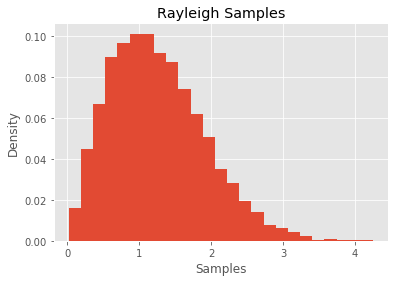

In [164]:
w = np.ones_like(R_Out) / N
plt.hist(x = R_Out, bins= 25, weights = w)
plt.title("Rayleigh Samples")
plt.ylabel("Density")
plt.xlabel("Samples")
plt.show()

# Appendix

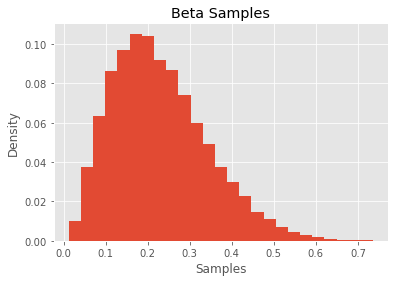

In [165]:
a = 3                                                    
b = 10
n = 10000

A = np.reshape(np.random.exponential(scale = 1, size = n*a), (n, a))
B = np.reshape(np.random.exponential(scale = 1, size = n*b), (n, b))

numerator = np.sum(A, axis = 1)
denom = np.sum(A, axis = 1) + np.sum(B, axis = 1)
betasamples = numerator/denom

w = np.ones(n) /n
plt.hist(betasamples, bins = 25, weights = w)
plt.title("Beta Samples")
plt.ylabel("Density")
plt.xlabel("Samples")
plt.show()


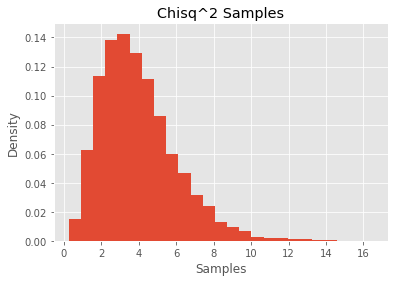

In [166]:
n = 10000
x = np.random.exponential(scale=1, size=(n, 4)) ## 4 columns
chisqResults = np.sum(a=x, axis=1)

w = np.ones(n) /n
plt.hist(chisqResults, bins = 25, weights = w)
plt.title("Chisq^2 Samples")
plt.ylabel("Density")
plt.xlabel("Samples")
plt.show()


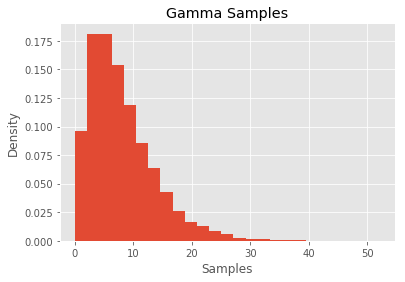

In [167]:
b = 4
a = 2
n = 10000
x = np.random.exponential(scale = 1, size = (n, a))
gammaResults = b*np.sum(x, axis = 1)

w = np.ones(n) /n
plt.hist(gammaResults, bins = 25, weights = w)
plt.title("Gamma Samples")
plt.ylabel("Density")
plt.xlabel("Samples")
plt.show()
